In [3]:
import sys
import os
import pandas as pd
current_path = os.getcwd()
parent_dir = os.path.join(current_path, "..")
print("Current working directory:", current_path)
print("Path to the parent directory:",parent_dir)
sys.path.append(parent_dir)
import numpy as np
import astropy.units as U
from casatasks import exportfits, simobserve, tclean, gaincal, applycal
from casatools import table
from casatools import simulator as casa_simulator
import random
import shutil
from astropy.constants import c
import math
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from scipy.optimize import curve_fit
import  utility.skymodels as sku
import utility.alma as au
import utility.astro as uas
import utility.plotting as uplt
import utility.skymodels as usk

Current working directory: /home/astro/Documents/GitHub/ALMASim/experimental
Path to the parent directory: /home/astro/Documents/GitHub/ALMASim/experimental/..


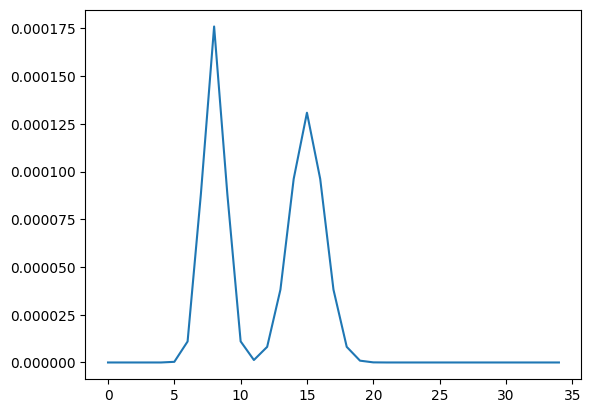

0.0007922003126256112 0.0007921998220500001


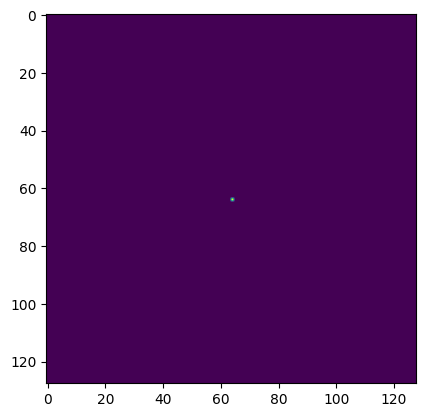

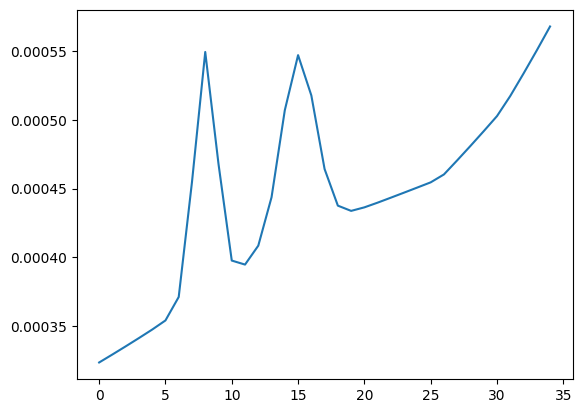

0.01567241031262561 0.015672409822050003


In [28]:
from scipy.integrate import quad


def gaussian(x, amp, cen, fwhm):
    """
    Generates a 1D Gaussian given the following input parameters:
    x: position
    amp: amplitude
    fwhm: fwhm
    """
    def integrand(x, amp, cen, fwhm):
        return np.exp(-(x-cen)**2/(2*(fwhm/2.35482)**2))

    integral, _ = quad(integrand, -np.inf, np.inf, args=(1, cen, fwhm))
    norm = 1 / integral
    return norm * amp * np.exp(-(x-cen)**2/(2*(fwhm/2.35482)**2))


continum = [0.00032362, 0.00032942, 0.00033533, 0.00034136, 0.00034753, 0.00035381,
        0.00036021, 0.00036672, 0.00037327, 0.00037988, 0.00038661, 0.00039345,
        0.00040031, 0.00040552, 0.00041079, 0.00041612, 0.00042153, 0.000426,
        0.00042939, 0.00043281, 0.00043626, 0.00043974, 0.00044337, 0.00044704,
        0.00045075, 0.00045449, 0.00046024, 0.00047049, 0.00048097, 0.00049168,
        0.00050263, 0.00051723, 0.00053354, 0.00055037, 0.00056773]

flux = [1.28982205e-06, 1.52e-6]
n_channels = len(continum)
cental_index = n_channels // 2
source_index = [8, 15] 
source_flux = [flux[i] + continum[source_index[i]] for i in range(len(source_index))]
source_fwhm = [2, 3]
z_idxs = np.arange(0, n_channels)
gs = np.zeros(n_channels)
for i in range(len(source_index)):
    gs += gaussian(z_idxs, source_flux[i], source_index[i], source_fwhm[i])  

#gs = gaussian(z_idxs, source_flux[0], source_index[0], source_fwhm[0]) 
plt.figure()
plt.plot(z_idxs, gs)
plt.show()
print(np.sum(gs), np.sum(source_flux))

datacube = np.zeros((128, 128, n_channels))
pos_x, pos_y = 64, 64
datacube[pos_x, pos_y, :] = continum + gs

image = np.sum(datacube, axis=2)
plt.figure()
plt.imshow(image)
plt.show()

spectrum = np.sum(datacube, axis=(0, 1))
plt.figure()
plt.plot(spectrum)
plt.show()

print(np.sum(datacube), np.sum(continum) + np.sum(source_flux))